<a href="https://colab.research.google.com/github/changsin/DeepLearningMadeEasy/blob/main/02-tf-train-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network using MNIST dataset

[MNIST](https://en.wikipedia.org/wiki/MNIST_database) is a database of handwritten digits used widely in Deep Learning. The wide popularity is reflected in the fact that the entire dataset is now part of TensorFlow Keras built-in library. The following statements import the MNIST dataset together with other imports.

## import libraries

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

There are ten digits (0,...9) so the number of classes is 10.

In [ ]:
NUM_OF_CLASSES = 10

Load the data in two tuples.

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Let's first examine what we have. We can see that the data type is numpy.ndarray which means that they are multi-dimensional arrays.

In [22]:
print("x_train data type: {} y_train: {}".format(type(x_train), type(y_train)))

x_train data type: <class 'numpy.ndarray'> y_train: <class 'numpy.ndarray'>


Since they are multi-dimensional array, let's see their shapes using .shape attribute

In [23]:
print("x_train.shape: {} y_train.shape: {}".format(x_train.shape, y_train.shape))

x_train.shape: (60000, 28, 28) y_train.shape: (60000,)


Let's first examine x_train elements by printing just its first element.

In [32]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

x_train consists of 60,000 greyscale images with size 28x28. You can see that they are mostly zeroes except a few places where you see numbers between 0 and 255. Since they are images, you can use pyplot to plot it as an image too.

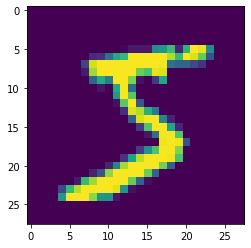

In [33]:
plt.imshow(x_train[0])

Thought it might be hard to recognize what it is, the corresponding ground truth (aka "label") is the number 5. We can verify it by printing its label: namely, the y_train value.

In [34]:
print("The ground truth y_train[0] is: {}".format(y_train[0]))

The ground truth y_train[0] is: 5


## Preprocessing
Before we can use them for training, a little bit of preprocessing is needed. For the reasons that will become much clearer later on, the input data need to be normalized to fit within 0 to 1 to make training easier. Since they are between 0 and 255, we can just divide each element by 255.

In [36]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Now let's see what they become.

In [37]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

Now all the values became floating numbers between 0 and 1.


For similar reasons, we need to "vectorize" the Y values. Keras comes with a utility function that just does it. All you have to do is to pass in the arrays with the number of classes as the second parameter.

In [38]:
y_train = to_categorical(y_train, NUM_OF_CLASSES)
y_test = to_categorical(y_test, NUM_OF_CLASSES)

Let's what it did.

In [39]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

A scalar number 5 became a vector of 10 elements with all zeroes except the sixth element. In other words, to_categorical() turned a number into a "one-hot" encoded vector. One-hot encoding means that everything is zero except just one element which is exactly what happend with to_categorical() function.

The preprocessing did not change the input shape but it reshaped the target shape as you can see from the output.

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


## Model
We are now ready to define our first model. Let's use Sequential to construct a three layer network.

In [41]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(28, 28)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 200)           5800      
_________________________________________________________________
flatten (Flatten)            (None, 5600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               840150    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 847,460
Trainable params: 847,460
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam(lr=0.005) 

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=28, epochs=10)

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2227 - accuracy: 0.9723


[0.2226552665233612, 0.9722999930381775]

In [ ]:
CLASS_NAMES = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(CLASS_NAMES)

preds = model.predict(x_test)

preds_single = CLASS_NAMES[np.argmax(preds, axis = -1)]
actual_single = CLASS_NAMES[np.argmax(y_test, axis = -1)]

[0 1 2 3 4 5 6 7 8 9]


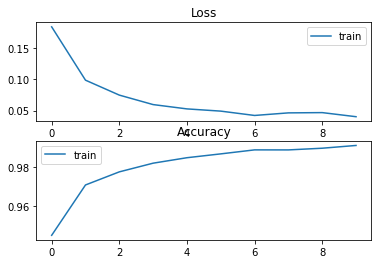

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# plot mse during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.show()

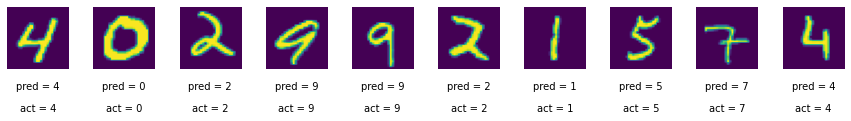

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)